In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from random import *
from scipy.stats import bernoulli




In [14]:
categories = np.genfromtxt("categories_places365.txt",delimiter=" ",dtype=None,encoding="utf-8")
categories = [name[0] for name in categories]
categories = categories[0:360:3]
categories[0]


'/a/airfield'

In [135]:
def sigmoid(x):
    return (1 / (1 + np.exp(-x)))

def find_indexes(df1,df2):
    highlight_indexes = []
    df_size = df1.shape[0]
    for i in range(0,df_size):
        if df1[i] >= df2[i]:
            highlight_indexes.append(i)

    return highlight_indexes

def highlight(ax,highlight_indexes):
    for bar in ax.patches:
        bar.set_facecolor('#d3d3d3')
    for idx in highlight_indexes:
        ax.patches[idx].set_facecolor('#cc3333')

In [138]:
scores1 = np.random.exponential(size=120)
scores2 = np.random.exponential(size=120)
scores3 = np.random.normal(loc = 0.7, scale=np.sqrt(1) , size= 120) 

In [139]:
scores1 = sigmoid(scores1)
scores2 = sigmoid(scores2)
scores3 = sigmoid(scores3)        
        

In [140]:
scores = pd.DataFrame({'model_a' : scores1, 'model_b': scores2, 'model_c': scores3})
scores.head()

,model_a,model_b,model_c
0,0.823887,0.685423,0.622327
1,0.865758,0.840738,0.556415
2,0.886164,0.555697,0.327484
3,0.591226,0.626572,0.364682
4,0.681565,0.585031,0.405591


In [172]:
scores.describe()

,model_a,model_b,model_c
count,120.000000,120.000000,120.000000
mean,0.692227,0.692485,0.647069
std,0.132506,0.169864,0.198955
min,0.500912,0.473272,0.164372
25%,0.570615,0.548309,0.525188
50%,0.677174,0.653712,0.673573
75%,0.788700,0.828255,0.812178
max,0.987150,0.988667,0.944587


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001863CF16B70>,
      dtype=object)

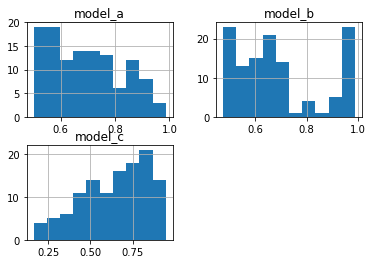

In [173]:
scores.hist()

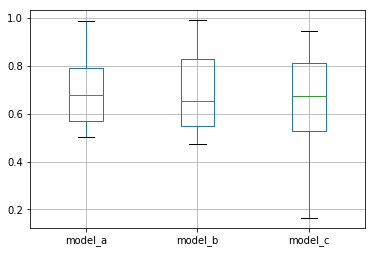

In [174]:
scores.boxplot()

* Quando A (80-94%) : B tem score muito alto. máximo 20 data points.
* Quando A intermediário (55-80%) : B < A com diferença de 0.5 - 1% (B perde)
* Em alguns casos onde A ~= 50% então B >90% para compensar a média

In [175]:
print(len(find_indexes(scores['model_a'],scores['model_b'])))

89


### transformações

In [145]:
count = 20
for i in range(0,120):
    val_a = scores.loc[i,['model_a']].values[0]
    val_b = scores.loc[i,['model_b']].values[0]
    if (val_a > 0.8 and val_a < 0.94) and count > 0 : 
        print('count : {} - {}'.format(count,scores.loc[i,['model_a','model_b']]))
        scores.at[i,'model_b'] = uniform(0.95,0.99)
        print('new value : {}'.format(scores.loc[i,['model_a','model_b']]))
        count -= 1
        

print(count)
        

count : 20 - model_a    0.823887
model_b    0.685423
Name: 0, dtype: float64
new value : model_a    0.823887
model_b    0.973212
Name: 0, dtype: float64
count : 19 - model_a    0.865758
model_b    0.840738
Name: 1, dtype: float64
new value : model_a    0.865758
model_b    0.979377
Name: 1, dtype: float64
count : 18 - model_a    0.886164
model_b    0.555697
Name: 2, dtype: float64
new value : model_a    0.886164
model_b    0.984035
Name: 2, dtype: float64
count : 17 - model_a    0.914939
model_b    0.859147
Name: 21, dtype: float64
new value : model_a    0.914939
model_b    0.985022
Name: 21, dtype: float64
count : 16 - model_a    0.936601
model_b    0.978243
Name: 26, dtype: float64
new value : model_a    0.936601
model_b    0.982629
Name: 26, dtype: float64
count : 15 - model_a    0.920331
model_b    0.674291
Name: 33, dtype: float64
new value : model_a    0.920331
model_b    0.956791
Name: 33, dtype: float64
count : 14 - model_a    0.841725
model_b    0.915862
Name: 34, dtype: float6

In [146]:
changes = 0
for i in range(0,120):
    val_a = scores.loc[i,['model_a']].values[0]
    val_b = scores.loc[i,['model_b']].values[0]
    if (val_a > 0.55 and val_a < 0.8) : 
        print('old value : {}'.format(scores.loc[i,['model_a','model_b']]))
        scores.at[i,'model_b'] = val_a - uniform(0.05,0.10)
        changes += 1
        print('new value : {}'.format(scores.loc[i,['model_a','model_b']]))

print(changes)

old value : model_a    0.591226
model_b    0.626572
Name: 3, dtype: float64
new value : model_a    0.591226
model_b    0.497656
Name: 3, dtype: float64
old value : model_a    0.681565
model_b    0.585031
Name: 4, dtype: float64
new value : model_a    0.681565
model_b    0.625814
Name: 4, dtype: float64
old value : model_a    0.561739
model_b    0.846168
Name: 5, dtype: float64
new value : model_a    0.561739
model_b    0.506258
Name: 5, dtype: float64
old value : model_a    0.765878
model_b    0.968770
Name: 7, dtype: float64
new value : model_a    0.765878
model_b    0.710802
Name: 7, dtype: float64
old value : model_a    0.578969
model_b    0.876970
Name: 9, dtype: float64
new value : model_a    0.578969
model_b    0.500353
Name: 9, dtype: float64
old value : model_a    0.704964
model_b    0.515685
Name: 10, dtype: float64
new value : model_a    0.704964
model_b    0.646082
Name: 10, dtype: float64
old value : model_a    0.759100
model_b    0.532608
Name: 11, dtype: float64
new value

In [156]:
count = 9
for i in range(0,120):
    val_a = scores.loc[i,['model_a']].values[0]
    val_b = scores.loc[i,['model_b']].values[0]
    if (val_a <= 0.55) and count > 0 : 
        print('old value : {}'.format(scores.loc[i,['model_a','model_b']]))
        scores.at[i,'model_b'] = uniform(0.95,0.99)
        count -= 1
        print('new value : {}'.format(scores.loc[i,['model_a','model_b']]))

print(count)

old value : model_a    0.524210
model_b    0.967821
Name: 6, dtype: float64
new value : model_a    0.524210
model_b    0.988667
Name: 6, dtype: float64
old value : model_a    0.504070
model_b    0.960575
Name: 8, dtype: float64
new value : model_a    0.504070
model_b    0.974115
Name: 8, dtype: float64
old value : model_a    0.521209
model_b    0.969889
Name: 16, dtype: float64
new value : model_a    0.521209
model_b    0.983249
Name: 16, dtype: float64
old value : model_a    0.543447
model_b    0.974462
Name: 27, dtype: float64
new value : model_a    0.543447
model_b    0.971936
Name: 27, dtype: float64
old value : model_a    0.516351
model_b    0.984064
Name: 29, dtype: float64
new value : model_a    0.516351
model_b    0.968391
Name: 29, dtype: float64
old value : model_a    0.525079
model_b    0.504622
Name: 35, dtype: float64
new value : model_a    0.525079
model_b    0.968684
Name: 35, dtype: float64
old value : model_a    0.528646
model_b    0.592467
Name: 43, dtype: float64
new

In [177]:
scores.loc[find_indexes(scores['model_b'],scores['model_a'])]

,model_a,model_b,model_c
0,0.823887,0.973212,0.622327
1,0.865758,0.979377,0.556415
2,0.886164,0.984035,0.327484
6,0.524210,0.988667,0.887870
8,0.504070,0.974115,0.772191
16,0.521209,0.983249,0.877515
27,0.543447,0.971936,0.686653
29,0.516351,0.968391,0.863374
34,0.841725,0.982262,0.857756
35,0.525079,0.968684,0.904492


In [169]:
#alterações manuais para manter quantidade de vitorias em A
v = [21,26,33,38,67,80]
for idx in v:
    scores.at[idx,'model_b'] = scores.at[idx,'model_a'] - 0.02

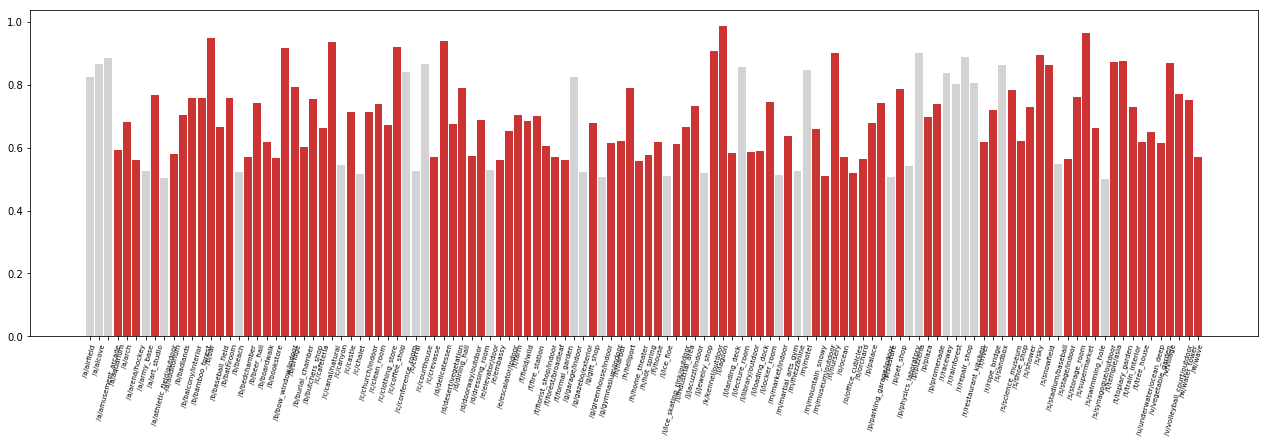

In [170]:
plt.figure(figsize=(22,6))
ax = plt.bar(np.arange(len(categories)),scores['model_a'],width=0.85)
plt.xticks(np.arange(len(categories)), categories,fontsize=7, rotation=75)
highlight(ax,find_indexes(scores['model_a'],scores['model_b']))


plt.show()

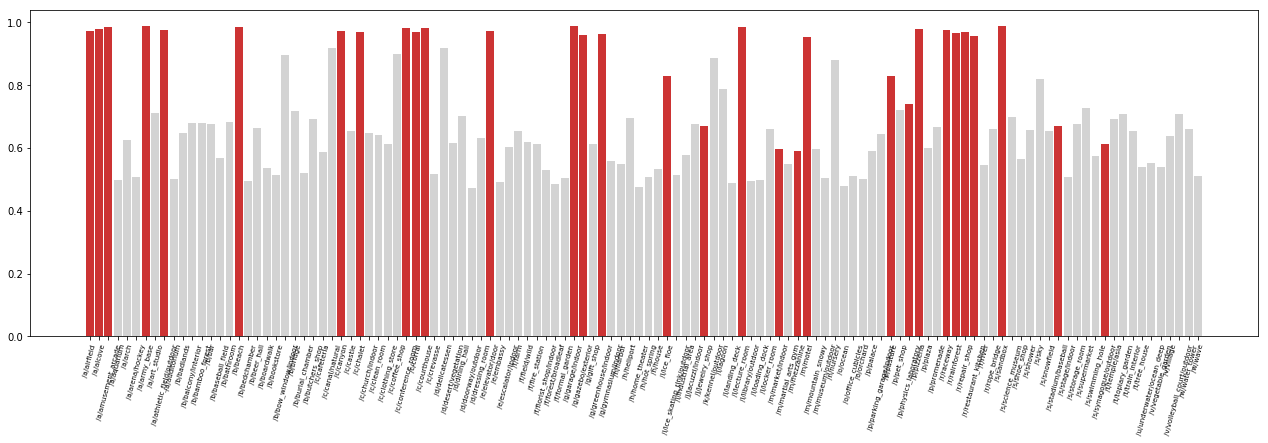

In [171]:
plt.figure(figsize=(22,6))
ax = plt.bar(np.arange(len(categories)),scores['model_b'],width=0.85)
plt.xticks(np.arange(len(categories)), categories,fontsize=7, rotation=75)
highlight(ax,find_indexes(scores['model_b'],scores['model_a']))


plt.show()

In [181]:
scores[['model_a','model_b']].to_csv("model_scores_alt.csv",index=False,sep=';',decimal=',')